## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author : Diwakar Sah

### Task 1 : Prediction using Supervised Machine Learning


In [15]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import statsmodels.api as sm
import matplotlib.pyplot as plt  
%matplotlib inline

In [16]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

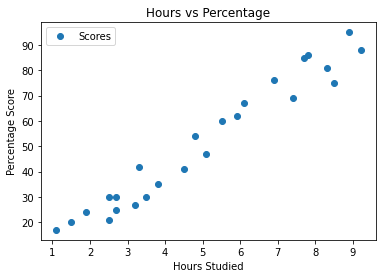

In [17]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
Here the attributes refer to number of hours studied and label refers to the scores of students

In [18]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
b = regressor.coef_
a = regressor.intercept_
print("coefficent of the line=",a,"\n","Interncept of the line = ",b)
print("Training complete.")

coefficent of the line= 2.018160041434662 
 Interncept of the line =  [9.91065648]
Training complete.


The regression line is given by, coefficent of the line * X + Interncept of the line : 2.018160041434662*X + 9.91065648

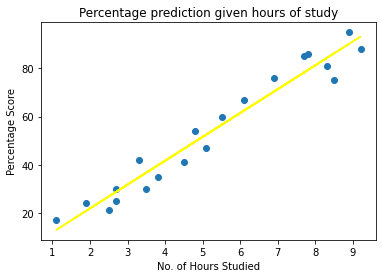

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line, color='YELLOW');
plt.title("Percentage prediction given hours of study")
plt.xlabel("No. of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [22]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Testing with given data i.e., if a student studies 9.25 hours

In [24]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error, score, R-squared value. There are many such metrics.

### Using mean square error for evaluating

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


**Calculating the model(regressor) score:**

In [26]:
regressor.score(X_test, y_test)

0.9454906892105354

**Calculating the R-squared value for evaluating the model**

In [27]:
x=sm.add_constant(X)
mode=sm.OLS(y,X).fit()
predictions=mode.predict(X)
print(mode.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                    6.10e-26
Time:                        16:03:01   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### The R-Spuared is 0.99 which indicates that the explained varaibility of the model(regressor) is 99%